In [9]:
!pip install transformers

# Import Libraries

In [10]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.metrics import f1_score, confusion_matrix

# Create the instance of sentiment analysis using pipeline

In [11]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [12]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

# Output is a dictionary with Label and score

In [13]:
classifier("I like deep learning")

[{'label': 'POSITIVE', 'score': 0.9997264742851257}]

In [14]:
classifier("This is not a bad movie")

[{'label': 'POSITIVE', 'score': 0.9994834661483765}]

In [15]:
classifier([
  "I want to learn this course.",
  "I am unable to understand this course because my prerequisites are not clear."])

[{'label': 'POSITIVE', 'score': 0.9974923133850098},
 {'label': 'NEGATIVE', 'score': 0.9997028708457947}]

# Read the Tweets.csv Dataset

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
classifier = pipeline("sentiment-analysis", device = device)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Transfer Learning NLP Transformer

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Transfer Learning NLP Transformer


In [ ]:
df = pd.read_csv('Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Check the labels

In [ ]:
df = df[['airline_sentiment', 'text']].copy()

<Axes: >

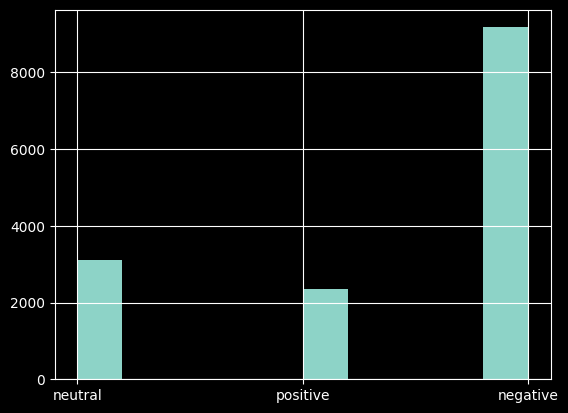

In [ ]:
df['airline_sentiment'].hist()

# Remove the neutral class from the dataset

In [ ]:
df = df[df.airline_sentiment != 'neutral'].copy()

In [ ]:
label_map = {'positive': 1, 'negative': 0}
df['labels'] = df['airline_sentiment'].map(label_map)

In [ ]:
df.head()

,airline_sentiment,text,labels
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
len(df)

11541

In [ ]:
df = df[['text', 'labels']]

In [ ]:
df.head()

,text,labels
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


# Pass the data through the classifier and get the predictions

In [ ]:
texts = df['text'].tolist()
predictions = classifier(texts)

In [ ]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070840954780579},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

# Tranform Positive Label to 1 and Negative to zero

In [ ]:
ypred = []
for i in predictions:
  if i['label'] == 'POSITIVE':
    ypred.append(1)
  else:
    ypred.append(0)

In [ ]:
len(ypred)

11541

# Calculate the accuracy of the model

In [ ]:
ypred = np.array(ypred)

In [ ]:
print("acc:", np.mean(df['labels'] == ypred))

acc: 0.8898708950697514


# Print the confusion matrix and find precision, recall and F1score

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

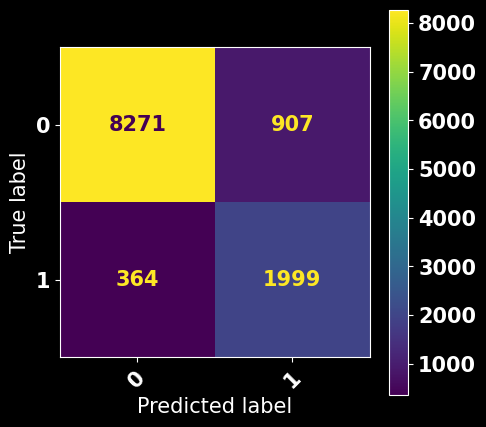

In [ ]:
cm = confusion_matrix(df['labels'], ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [ ]:
Accuracy = accuracy_score(df['labels'], ypred, normalize=True).round(3)
Precision = precision_score(df['labels'], ypred, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(df['labels'], ypred, average = 'macro').round(3)
F1_Score = f1_score(df['labels'], ypred, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.89
 
Precision :  0.823
 
Recall :  0.874
 
F1_Score :  0.844
 
